In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)

Populating the interactive namespace from numpy and matplotlib


In [62]:
# Load and clean the data a little 
data = pd.read_csv("searchLog.csv")
data.drop_duplicates(inplace = True)
data.rename(columns = lambda x: x.strip(), inplace = True)
data.rename(columns = lambda x: x.lower(), inplace = True)
data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).apply(lambda x: x.str.strip())
data.drop(data[data['heuristic'] == 'Random'].index,inplace=True)
data.replace('z', '', regex=True, inplace=True)
data.to_csv("searchLog.csv",index=False)
data.tail()

,algorithm,heuristic,problem,branches explored,arcs revised,number of vars,number of constraints
65,Forward Checking,Name,FinnishSudoku,3027747,7816364,81,810
66,Forward Checking,MaxDegree,FinnishSudoku,218711,537743,81,810
67,Maintaining Arc Consistency,Smallest Domain,FinnishSudoku,4211,55013,81,810
68,Maintaining Arc Consistency,Name,FinnishSudoku,9805,89290,81,810
69,Maintaining Arc Consistency,MaxDegree,FinnishSudoku,1313,7692,81,810


In [64]:
# Calculate some additional measurements and prepare the data for plotting
data['branch per constraint'] = data['branches explored']/data['number of constraints']
data['branch per variable'] = data['branches explored']/data['number of vars']
datah = data.copy(deep=True)
datah['algorithm'] = datah['algorithm'] + "+" + datah['heuristic']
datah.drop(columns=['heuristic'],inplace=True)
datah.head()

,algorithm,problem,branches explored,arcs revised,number of vars,number of constraints,branch per constraint,branch per variable
0,Backtracking+None,10Queens,975,0,10,45,21.666667,97.5
1,Forward Checking+Smallest Domain,10Queens,292,517,10,45,6.488889,29.2
2,Forward Checking+Name,10Queens,150,215,10,45,3.333333,15.0
3,Forward Checking+MaxDegree,10Queens,150,215,10,45,3.333333,15.0
4,Maintaining Arc Consistency+Smallest Domain,10Queens,54,315,10,45,1.200000,5.4


/cs/home/dav/Documents/workdir/CS4144/python/lib64/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


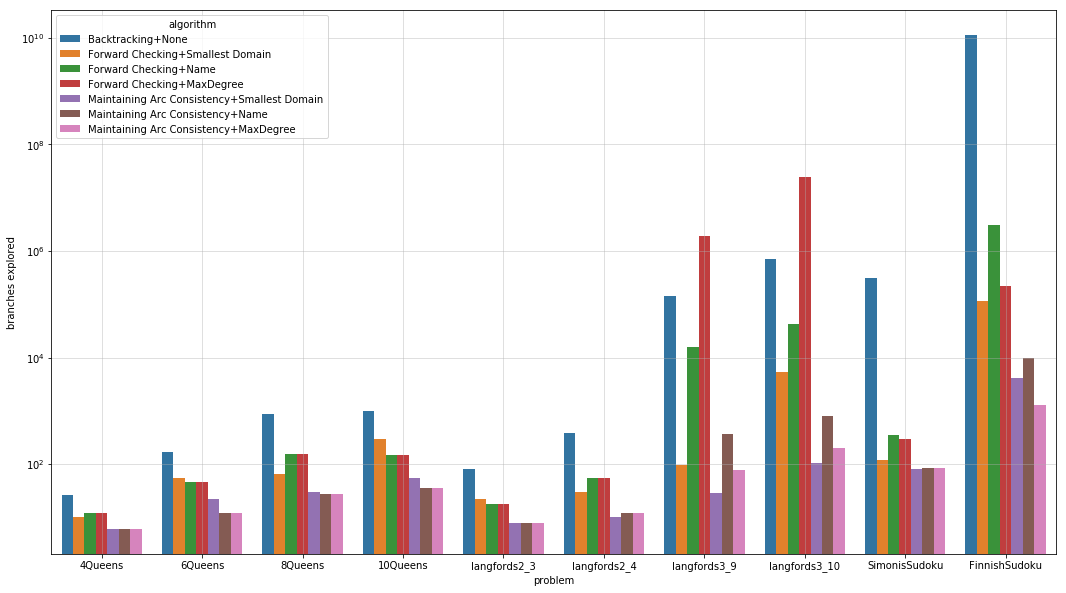

In [65]:
# Plot the grouped data
g = sns.barplot(x='problem',y='branches explored',data=datah,hue='algorithm',
               order=['4Queens','6Queens','8Queens','10Queens',
                      'langfords2_3','langfords2_4','langfords3_9','langfords3_10',
                      'SimonisSudoku','FinnishSudoku',])
g.set_yscale('log')
plt.grid(True,which="both",alpha = 0.5)

/cs/home/dav/Documents/workdir/CS4144/python/lib64/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


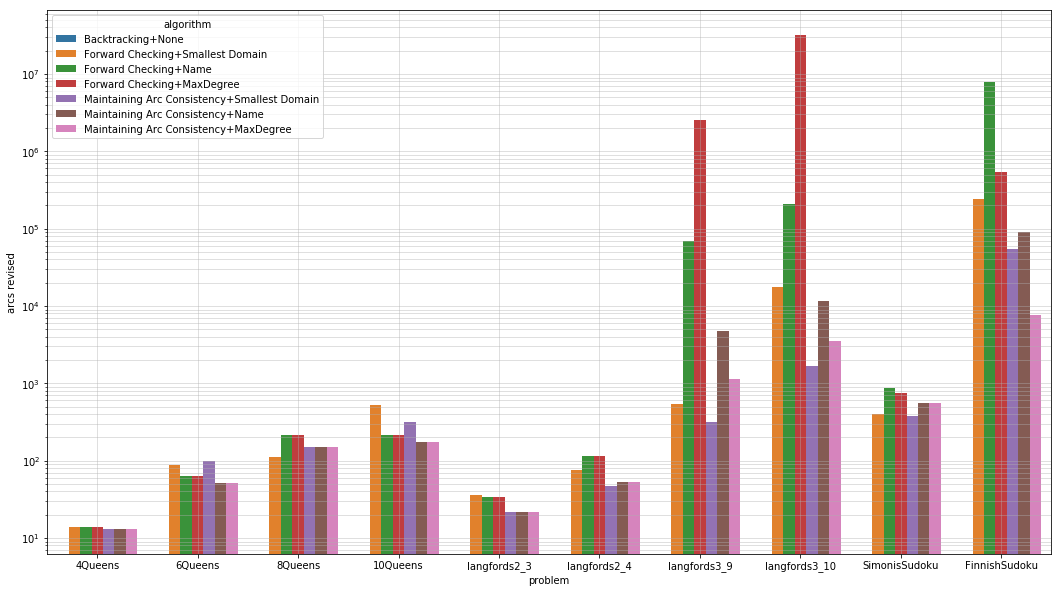

In [66]:
# Plot the grouped data
g = sns.barplot(x='problem',y='arcs revised',data=datah,hue='algorithm',
               order=['4Queens','6Queens','8Queens','10Queens',
                      'langfords2_3','langfords2_4','langfords3_9','langfords3_10',
                      'SimonisSudoku','FinnishSudoku',])
g.set_yscale('log')
plt.grid(True,which="both",alpha = 0.5)

/cs/home/dav/Documents/workdir/CS4144/python/lib64/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


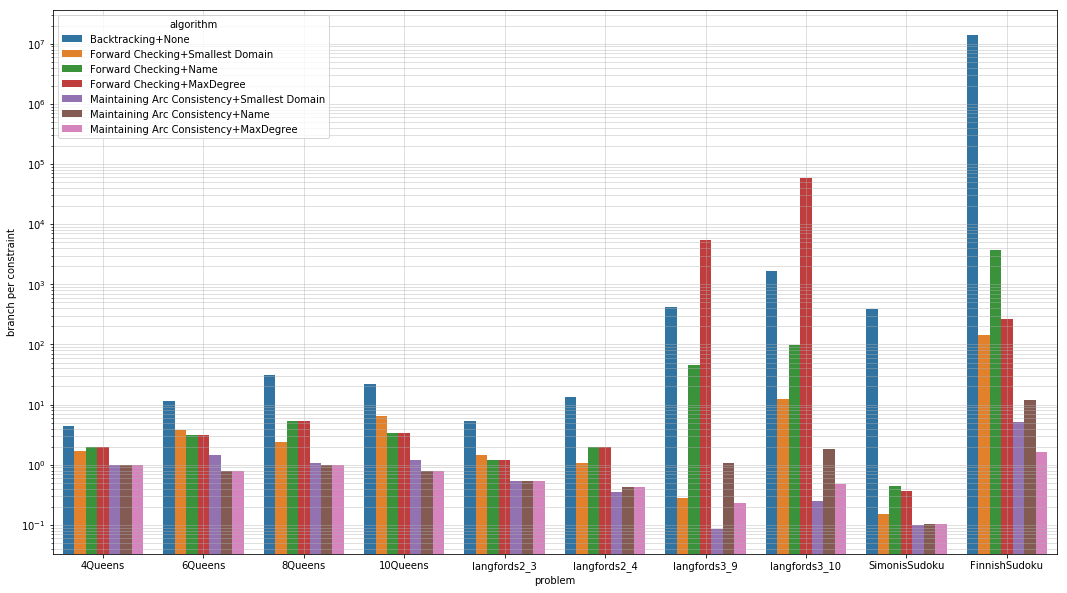

In [67]:
# Plot the grouped data
g = sns.barplot(x='problem',y='branch per constraint',data=datah,hue='algorithm',
               order=['4Queens','6Queens','8Queens','10Queens',
                      'langfords2_3','langfords2_4','langfords3_9','langfords3_10',
                      'SimonisSudoku','FinnishSudoku',])
g.set_yscale('log')
plt.grid(True,which="both",alpha = 0.5)

/cs/home/dav/Documents/workdir/CS4144/python/lib64/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


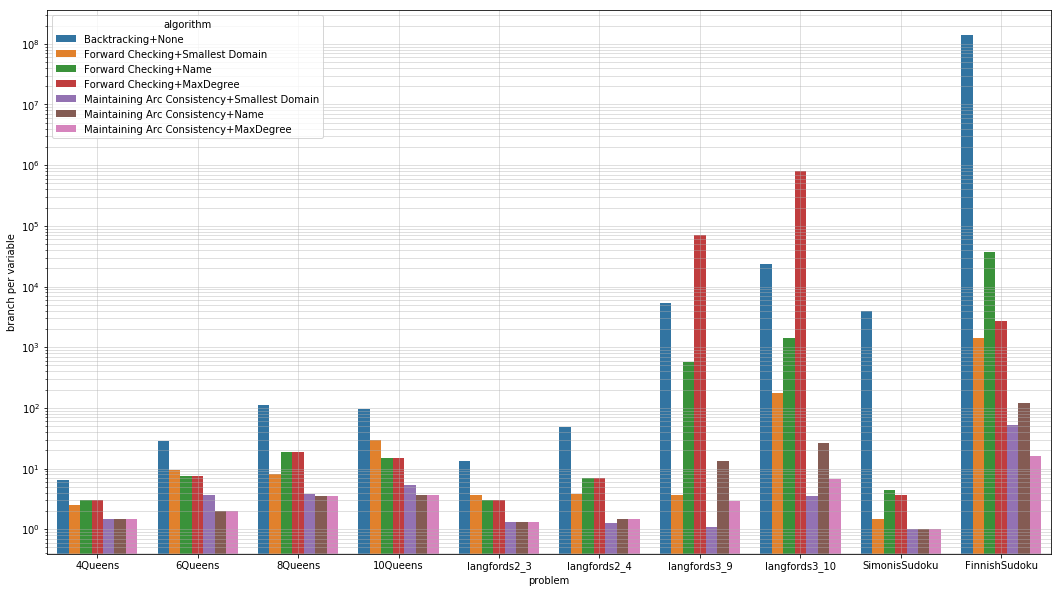

In [68]:
# Plot the grouped data
g = sns.barplot(x='problem',y='branch per variable',data=datah,hue='algorithm',
               order=['4Queens','6Queens','8Queens','10Queens',
                      'langfords2_3','langfords2_4','langfords3_9','langfords3_10',
                      'SimonisSudoku','FinnishSudoku',])
g.set_yscale('log')
plt.grid(True,which="both",alpha = 0.5)

/cs/home/dav/Documents/workdir/CS4144/python/lib64/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


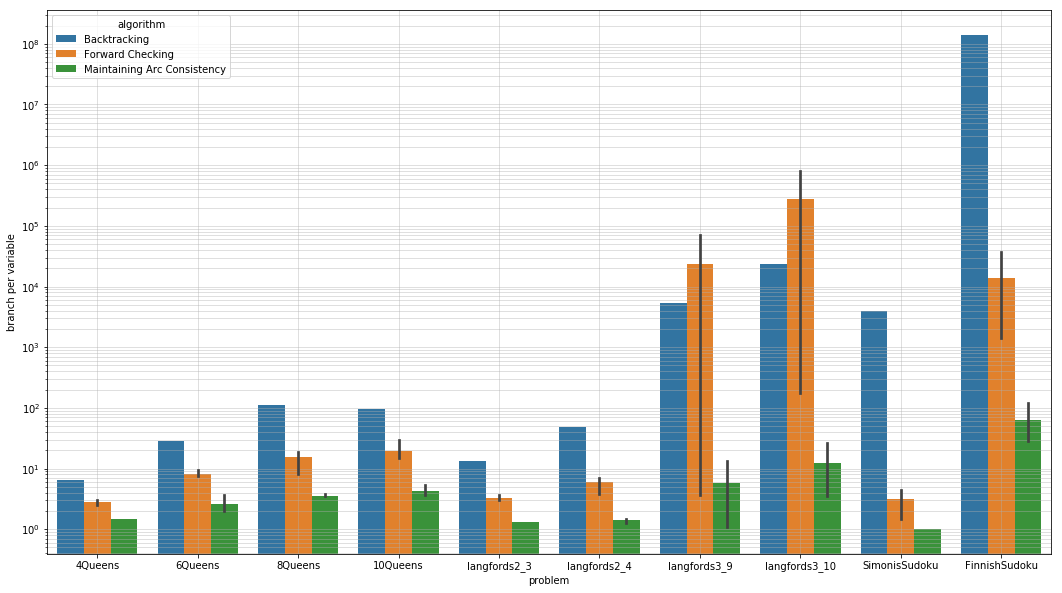

In [69]:
# Plot the grouped data
g = sns.barplot(x='problem',y='branch per variable',data=data,hue='algorithm',
               order=['4Queens','6Queens','8Queens','10Queens',
                      'langfords2_3','langfords2_4','langfords3_9','langfords3_10',
                      'SimonisSudoku','FinnishSudoku',])
g.set_yscale('log')
plt.grid(True,which="both",alpha = 0.5)